### Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("tcas.xlsx")

# EDA

### Handle missing values

###### Drop missing value more than 50%

In [3]:
threshold = 50
#Delete Attributes that missing more than 50%
df = df[df.columns[(df.isnull().sum()/len(df)*100)<=threshold]]

#Delete Attributes that missing more than 50%
df = df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100)<=threshold]]

df.shape

(19117, 72)

In [4]:
#Check for any duplicate
len(df[df.duplicated()])

0

###### Drop redundant attributes

In [5]:
#pd.options.display.max_columns = 100
df.drop(df.iloc[:, :3], axis=1, inplace=True)

In [6]:
df.drop(df.iloc[:, 1:2], axis=1, inplace=True)
df.head()

,Sex,FacultyName,DepartmentCode,DepartmentName,EntryTypeID,EntryTypeName,EntryGroupID,EntryGroupName,TCAS,LevelID,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
26,Female,School of Liberal Arts,1006,English,10,QUOTA 17 NORTHERN PROVINCES,623020,โควตา 17 จังหวัดภาคเหนือ,2,3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
27,Male,School of Liberal Arts,1006,English,10,QUOTA 17 NORTHERN PROVINCES,623020,โควตา 17 จังหวัดภาคเหนือ,2,3,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
28,Female,School of Liberal Arts,1006,English,29,DIRECT ADMISSION BY SCHOOL,623011,โครงการโควตาพิเศษสำนักวิชา,1,3,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
29,Female,School of Liberal Arts,1006,English,29,DIRECT ADMISSION BY SCHOOL,623011,โครงการโควตาพิเศษสำนักวิชา,1,3,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,MFU student
30,Female,School of Liberal Arts,1006,English,10,QUOTA 17 NORTHERN PROVINCES,623020,โควตา 17 จังหวัดภาคเหนือ,2,3,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student


In [7]:
df = df.drop(columns=['DepartmentCode', 'DepartmentName', 'EntryTypeID', 'EntryGroupID', 'EntryGroupName', 'NationName', 'ReligionName', 'TCAS'])
df.head()

,Sex,FacultyName,EntryTypeName,LevelID,LevelName,LevelNameEng,ApplicationDate,HomeRegion,StudentTH,StudentType,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
26,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,3,ปริญญาตรี,Undergraduate,02/18/2019,North,1,THAI,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
27,Male,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,3,ปริญญาตรี,Undergraduate,02/18/2019,North,1,THAI,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
28,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,3,ปริญญาตรี,Undergraduate,2018-06-12 00:00:00,North,1,THAI,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
29,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,3,ปริญญาตรี,Undergraduate,2018-06-12 00:00:00,North,1,THAI,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,MFU student
30,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,3,ปริญญาตรี,Undergraduate,2019-05-03 00:00:00,North,1,THAI,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student


In [8]:
df.drop(df.iloc[:, 3:7], axis=1, inplace=True)
df.head()

,Sex,FacultyName,EntryTypeName,HomeRegion,StudentTH,StudentType,ProvinceNameEng,SchoolRegionNameEng,GPAX,GPA_Eng,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
26,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,1,THAI,TAK,Northern,3.61,3.94,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
27,Male,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,1,THAI,CHIANG RAI,Northern,3.04,3.75,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
28,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,1,THAI,TAK,Northern,3.92,4.00,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
29,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,1,THAI,CHIANG RAI,Northern,3.46,3.91,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,MFU student
30,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,1,THAI,CHIANG RAI,Northern,3.40,3.73,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student


In [9]:
df.drop(df.iloc[:, 4:8], axis=1, inplace=True)
df.head()

,Sex,FacultyName,EntryTypeName,HomeRegion,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
26,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.61,3.94,3.33,3.41,3.86,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
27,Male,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.04,3.75,2.30,1.75,2.82,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
28,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.92,4.00,3.68,3.91,4.00,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
29,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.46,3.91,2.36,3.25,3.67,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,MFU student
30,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.40,3.73,2.30,3.30,2.92,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student


In [10]:
df.drop(df.iloc[:, 5:10], axis=1, inplace=True)
df.head()

,Sex,FacultyName,EntryTypeName,HomeRegion,GPAX,Q2,Q3,Q4,Q5,Q6,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
26,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.61,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
27,Male,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.04,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
28,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.92,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
29,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.46,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,MFU student
30,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.40,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student


In [11]:
df.drop(df.iloc[:, 6:32], axis=1, inplace=True)
df.head()

,Sex,FacultyName,EntryTypeName,HomeRegion,GPAX,Q2,Q29,Q30,Q31,Q32,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
26,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.61,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
27,Male,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.04,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
28,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.92,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
29,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.46,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,MFU student
30,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.40,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student


In [12]:
df.drop(df.iloc[:, 7:11], axis=1, inplace=True)
df.head()

,Sex,FacultyName,EntryTypeName,HomeRegion,GPAX,Q2,Q29,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
26,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.61,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MFU student
27,Male,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.04,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,MFU student
28,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.92,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student
29,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.46,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,MFU student
30,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.40,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,MFU student


In [13]:
df.drop(df.iloc[:, 8:12], axis=1, inplace=True)
df.head()

,Sex,FacultyName,EntryTypeName,HomeRegion,GPAX,Q2,Q29,Q34,Q39,Q40,Q41,Q42,Status
26,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.61,1.0,1.0,1.0,1.0,0.0,0.0,0.0,MFU student
27,Male,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.04,1.0,0.0,1.0,1.0,1.0,0.0,1.0,MFU student
28,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.92,1.0,1.0,1.0,1.0,0.0,0.0,0.0,MFU student
29,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.46,1.0,1.0,1.0,1.0,1.0,0.0,0.0,MFU student
30,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.40,1.0,1.0,1.0,1.0,0.0,0.0,0.0,MFU student


In [14]:
df.drop(df.iloc[:, 9:12], axis=1, inplace=True)
df.head()

,Sex,FacultyName,EntryTypeName,HomeRegion,GPAX,Q2,Q29,Q34,Q39,Status
26,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.61,1.0,1.0,1.0,1.0,MFU student
27,Male,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.04,1.0,0.0,1.0,1.0,MFU student
28,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.92,1.0,1.0,1.0,1.0,MFU student
29,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.46,1.0,1.0,1.0,1.0,MFU student
30,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.40,1.0,1.0,1.0,1.0,MFU student


In [15]:
#Drop rows with missing value
# df.drop(df[df.GPAX.isnull() == True].index, inplace=True)
# df.head()

In [16]:
#Check for missing values
df.head()

,Sex,FacultyName,EntryTypeName,HomeRegion,GPAX,Q2,Q29,Q34,Q39,Status
26,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.61,1.0,1.0,1.0,1.0,MFU student
27,Male,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.04,1.0,0.0,1.0,1.0,MFU student
28,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.92,1.0,1.0,1.0,1.0,MFU student
29,Female,School of Liberal Arts,DIRECT ADMISSION BY SCHOOL,North,3.46,1.0,1.0,1.0,1.0,MFU student
30,Female,School of Liberal Arts,QUOTA 17 NORTHERN PROVINCES,North,3.40,1.0,1.0,1.0,1.0,MFU student


In [17]:
#Fix with mode
df[['HomeRegion']] = df.HomeRegion.fillna(df.HomeRegion.mode()[0])
df.isnull().sum()

Sex                0
FacultyName        0
EntryTypeName      0
HomeRegion         0
GPAX             178
Q2                 0
Q29                0
Q34                0
Q39                0
Status             0
dtype: int64

In [18]:
#Drop an unused sample
# df.drop(df[df.International == 1].index, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'International'

### Plot

In [19]:
#Box plot
# df.boxplot(column='GPAX')

# #Remove GPAX outlier
# df.drop(df[df.GPAX == 0.01].index, inplace=True)
# df.GPAX.min()

# sns.countplot(data=df, x='HomeRegion', hue=df.TCAS)

AttributeError: 'DataFrame' object has no attribute 'TCAS'

In [ ]:
#Count plot
# plt.figure(figsize=(30,10))
# sns.countplot(df.Status)
# plt.show()

In [ ]:
#Drop outliers
# df.drop(df[df.GPAX == 0.01].index, inplace=True)

#Reset index
# df.reset_index(drop=True, inplace=True)

### Feature Engineering

In [ ]:
# df.dtypes

In [ ]:
# df.FacultyName.value_counts()

In [ ]:
# df.EntryTypeName.value_counts()

In [ ]:
# df.SchoolRegionNameEng.value_counts()

In [ ]:
#Quata by school EntryTypeName
#North HomeRegion
#Female Sex
#Management FacultyName
#GPAX

#Q2
#Q29
#Q34
#Q39

#Class

# plt.figure(figsize=(60,30))
# sns.countplot(data=df_test, x='Q39', hue='Status')

#### Categorize Data

In [20]:
cat_data = df[['Sex', 'FacultyName', "HomeRegion"]]
# num_data = df[["Q2", "Q29", "Q34", "Q39"]]
class_data = df[['Status']]

###### Nominal to numeric

In [21]:
sex = cat_data['Sex']
sex = pd.get_dummies(sex)

# FacultyName = cat_data['FacultyName']
# FacultyName = pd.get_dummies(FacultyName)

# EntryTypeName = cat_data['EntryTypeName']
# EntryTypeName = pd.get_dummies(EntryTypeName)

HomeRegion = cat_data['HomeRegion']
HomeRegion = pd.get_dummies(HomeRegion)

In [22]:
#Concat
transform_data = pd.concat([sex, HomeRegion], axis=1)

In [23]:
transform_data

,Female,Male,Bankok,Central,East,International,North,North East,South,West
26,1,0,0,0,0,0,1,0,0,0
27,0,1,0,0,0,0,1,0,0,0
28,1,0,0,0,0,0,1,0,0,0
29,1,0,0,0,0,0,1,0,0,0
30,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
36396,1,0,0,0,0,0,0,0,1,0
36397,1,0,0,0,0,0,1,0,0,0
36398,1,0,0,0,1,0,0,0,0,0
36399,1,0,0,0,0,0,1,0,0,0


In [24]:
transform_data = transform_data.drop(columns=['International'])

In [25]:
transform_data.reset_index(drop=True, inplace=True)
class_data.reset_index(drop=True, inplace=True)
transform_data

,Female,Male,Bankok,Central,East,North,North East,South,West
0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
19112,1,0,0,0,0,0,0,1,0
19113,1,0,0,0,0,1,0,0,0
19114,1,0,0,0,1,0,0,0,0
19115,1,0,0,0,0,1,0,0,0


### Data Classification

#### Preparing data for KNN

In [36]:
X = transform_data
Y = df.iloc[:,-1]
X
Y

26           MFU student
27           MFU student
28           MFU student
29           MFU student
30           MFU student
              ...       
36396    Not MFU student
36397    Not MFU student
36398    Not MFU student
36399    Not MFU student
36400    Not MFU student
Name: Status, Length: 19117, dtype: object

##### Normalization (They're already in the same range)

-

###### 4-Steps KNN classification

-

#### Split Training

In [40]:
# Import module from sklean to split data onto training and test sets
from sklearn.model_selection import train_test_split

# Split training set and test set with ration 80% : 20% by specify test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)#, random_state = 0)

# Print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (15293, 9)
y_train shape:  (15293,)
x_test shape:  (3824, 9)
y_test shape:  (3824,)


In [41]:
Y.value_counts()

Not MFU student    13424
MFU student         5693
Name: Status, dtype: int64

In [42]:
y_train.value_counts()

Not MFU student    10755
MFU student         4538
Name: Status, dtype: int64

In [43]:
y_test.value_counts()

Not MFU student    2669
MFU student        1155
Name: Status, dtype: int64

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 17/70%
knn = KNeighborsClassifier(n_neighbors=44, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)
print('Tesing Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Tesing Accuracy:  0.7021443514644351
Tesing Classification Error:  0.2978556485355649
Confusion matrix:
[[   0 1139]
 [   0 2685]]


##### Stratified Splitting

In [82]:
#Step 1: Import the sklearn classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=1 
knn = KNeighborsClassifier(n_neighbors=44, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (5-fold)
cv_results = cross_validate(knn, X,Y, cv=5, return_train_score=True)
cv_results

{'fit_time': array([0.17852092, 0.18136406, 0.184093  , 0.17092657, 0.18601131]),
 'score_time': array([0.52901316, 0.52299881, 0.5087378 , 0.52709651, 0.53601098]),
 'test_score': array([0.6166318 , 0.62944561, 0.63719592, 0.55218415, 0.51791787]),
 'train_score': array([0.6282613 , 0.62505722, 0.63737413, 0.54910422, 0.55766967])}

In [83]:
# Accuracy score for each fold 
print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Tesing Accuracy for each fold: [0.6166318  0.62944561 0.63719592 0.55218415 0.51791787]
Cross Validation Accuracy: 0.591 +/- 0.047


#### Choosing K

In [75]:
# Experimenting with different k values
from sklearn import metrics
k_range = list(range(1,50))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())
    print(k, cv_results['test_score'].mean())

1 0.5316074740163204
2 0.459691387015057
3 0.5092246715229382
4 0.42971773195921437
5 0.5169138044661058
6 0.45561153331625537
7 0.5580258205631786
8 0.4842810506887016
9 0.5808395405152728
10 0.539933472584399
11 0.6058933470394917
12 0.556938551088282
13 0.615831543431663
14 0.5734675266952614
15 0.6026568818708686
16 0.5817878599782365
17 0.6104542573385967
18 0.6104542573385967
19 0.6330483995980111
20 0.5919919142423624
21 0.5919919142423624
22 0.5901604124108606
23 0.6335191108950821
24 0.5918350104766721
25 0.6107157636147474
26 0.5903696174317813
27 0.6107157636147474
28 0.6107157636147474
29 0.6116048849536596
30 0.6116048849536596
31 0.6136454275949196
32 0.595130783243455
33 0.6138023313606099
34 0.595130783243455
35 0.5952876870091455
36 0.595130783243455
37 0.595130783243455
38 0.5944508669254635
39 0.6169927079296476
40 0.6143776451681413
41 0.6169927079296476
42 0.6169927079296476
43 0.6169927079296476
44 0.6169927079296476
45 0.6366579798961747
46 0.635507352281112
47 0

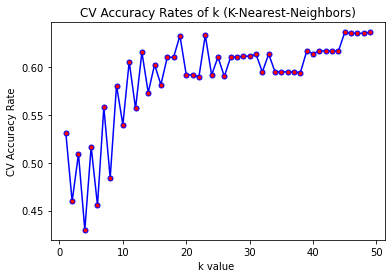

In [76]:
# create a line graph for testing accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [84]:
# find best k with the highest cv accuracy
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('best k = ', index, 'accuracy = ', value)

best k =  44 accuracy =  0.6366579798961747


#### KNN Model Creation

In [85]:
#Step 1: Import the sklearn class
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=7 (best k) 
best_knn = KNeighborsClassifier(n_neighbors=44, metric = 'euclidean') 

#Step 3: Fit the model with data (model training)
#Model is learning the relationship between data (X) and class(Y)
best_knn.fit(X,Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=44)

#### Deploying the model

In [ ]:
# Predict the class label for new record(s)
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]  # (1) define/read 2 new instances
X_new = sc.transform(X_new) # (2) normalize them using the normalization model created previously (sc is StandardScaler)
best_knn.predict(X_new) # (3) predict their class lables